In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from numpy.random import randn
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
flight_dframe = sns.load_dataset('flights')

In [4]:
flight_dframe.tail()

,year,month,passengers
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390
143,1960,December,432


In [5]:
#create pivot table
flight_dframe = flight_dframe.pivot('month','year','passengers')

In [6]:
flight_dframe

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
April,129,135,163,181,235,227,269,313,348,348,396,461
August,148,170,199,242,272,293,347,405,467,505,559,606
December,118,140,166,194,201,229,278,306,336,337,405,432
February,118,126,150,180,196,188,233,277,301,318,342,391
January,112,115,145,171,196,204,242,284,315,340,360,417
July,148,170,199,230,264,302,364,413,465,491,548,622
June,135,149,178,218,243,264,315,374,422,435,472,535
March,132,141,178,193,236,235,267,317,356,362,406,419
May,121,125,172,183,229,234,270,318,355,363,420,472


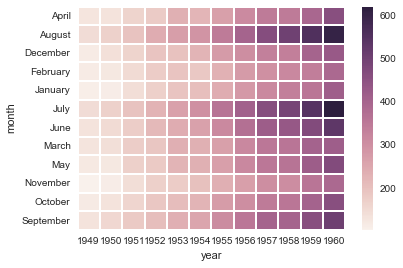

In [7]:
#make a heatmap
sns.heatmap(flight_dframe)

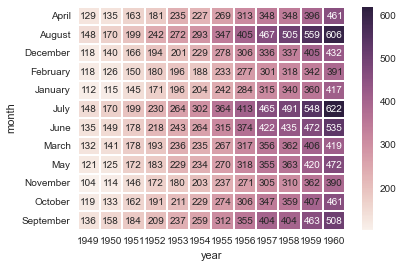

In [9]:
sns.heatmap(flight_dframe,annot=True,fmt='d')
#seaborn can pick the color scheme automatically

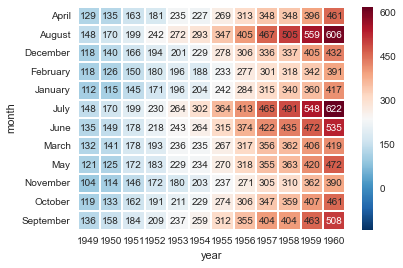

In [13]:
#depends on whether it's a converging or diverging dataset, Flights is a converging
sns.heatmap(flight_dframe,center=flight_dframe.loc['January',1955],annot=True,fmt='d')
#unless you give it a center location. The values will diverge from the center

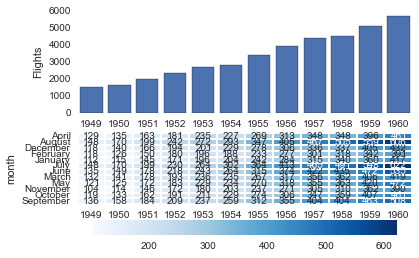

In [17]:
f,(axis1,axis2) = plt.subplots(2,1)

yearly_flights = flight_dframe.sum()

years = pd.Series(yearly_flights.index.values)

years = pd.DataFrame(years)

flights = pd.Series(yearly_flights.values)
flights = pd.DataFrame(flights)

year_dframe = pd.concat((years,flights),axis=1)
year_dframe.columns = ['Year','Flights']
year_dframe

sns.barplot('Year',y='Flights', data = year_dframe,ax=axis1)
sns.heatmap(flight_dframe,cmap='Blues',ax=axis2,cbar_kws={'orientation':'horizontal'})#,annot=True,fmt='d')
#cmap lets you pass a color code
#cbar is color bar

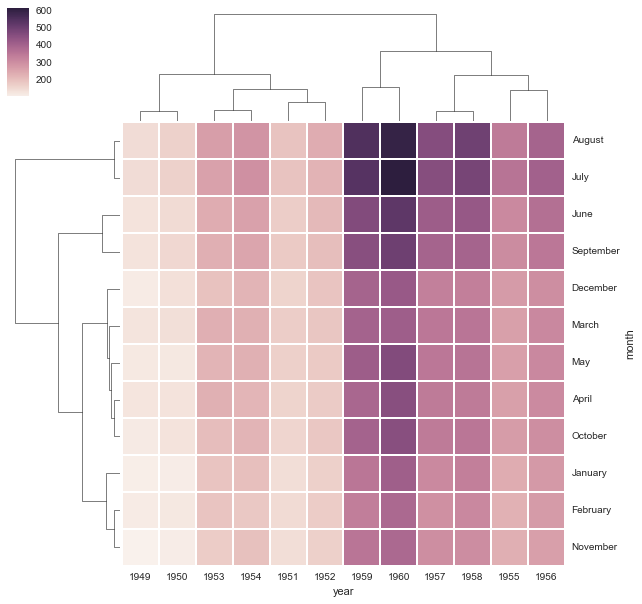

In [18]:
#cluster map
sns.clustermap(flight_dframe)

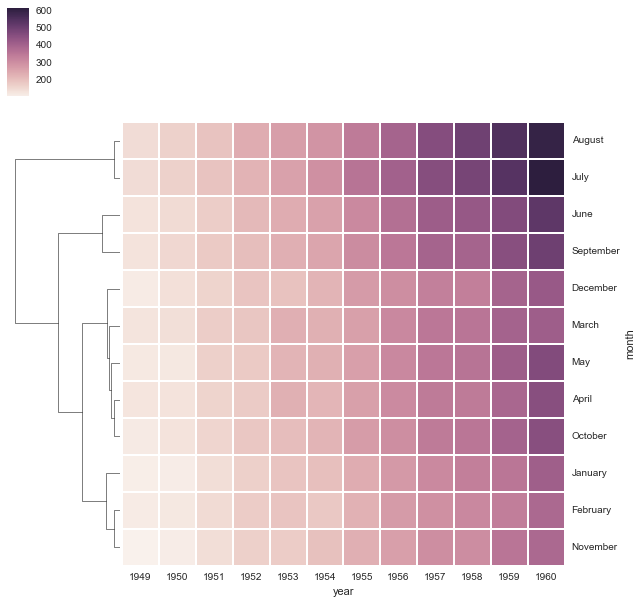

In [19]:
sns.clustermap(flight_dframe,col_cluster=False)
#col_cluster = false says to only cluster the rows, and not the columns

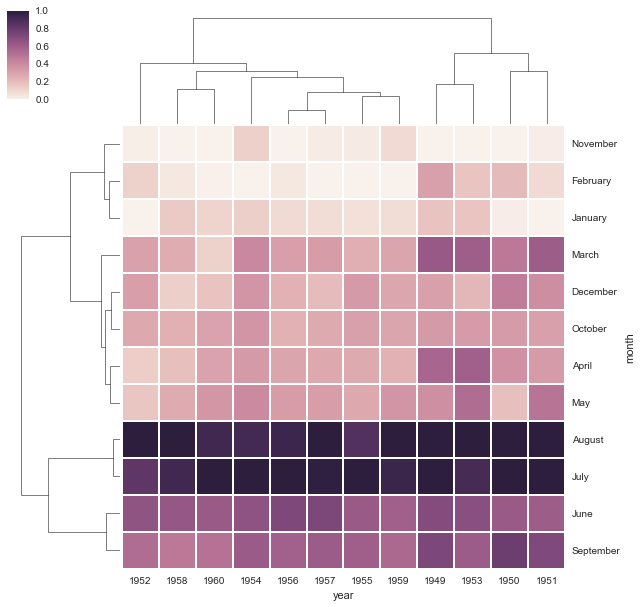

In [20]:
#the flights are increasing every year, so we can set a standard scale
sns.clustermap(flight_dframe,standard_scale=1)
#we're standardizing by the columns, which is the year in this case

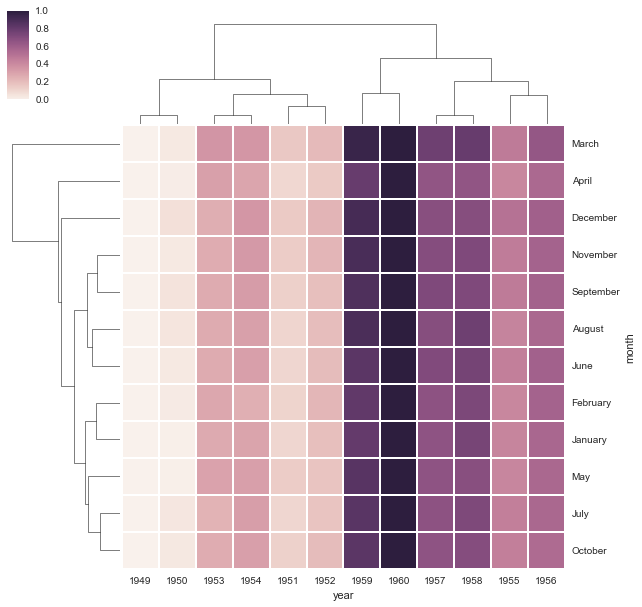

In [21]:
#can also scale by rows
sns.clustermap(flight_dframe,standard_scale=0)

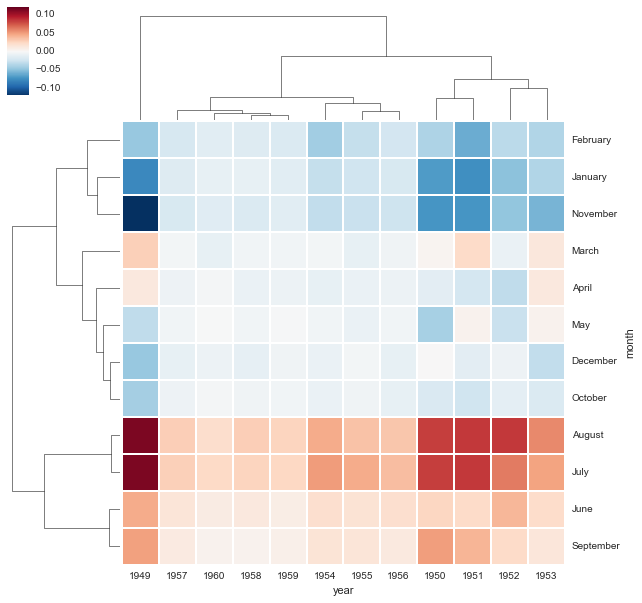

In [22]:
#can normalize rows by their z-score, which subtracts the mean and divides by the std dev of each column. 
#the rows have a mean of zero and a variance of 1
sns.clustermap(flight_dframe,z_score=1)